In [1]:
import csv
import cv2
import numpy as np

lines = []

with open('../data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(csvfile)
    for line in reader:
        lines.append(line)
        # print(line)

images = []
measurements = []

for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = '../data/IMG/' + filename
    image = cv2.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

X_train = np.array(images)
y_train = np.array(measurements)

In [2]:
# a FC network
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda

Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(Lambda(lambda x: ((x/255.0) - 0.5), input_shape=(160,320,3)))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer = 'adam')# a FC network
from keras.models import Sequential
from keras.layers import Flatten, Dense
model.fit(X_train,y_train, validation_split=0.2, shuffle=True, initial_epoch=0, epochs=1)

model.save('single-layer-fc-model.h5')
print(model.summary())

Train on 6428 samples, validate on 1608 samples
Epoch 1/1
6428/6428 [==============================] - 7s - loss: 1.5270 - val_loss: 0.6850
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 153600)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 153601    
Total params: 153,601
Trainable params: 153,601
Non-trainable params: 0
_________________________________________________________________
None


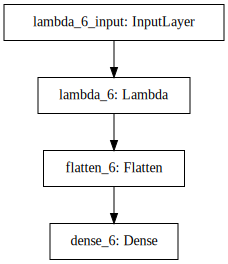

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [4]:
# Save the above visualisation to an image
# from keras.utils import plot_model
# plot_model(model, to_file='model.png')

In [13]:
# model.h5 will be generated.
# Use that to feed to simulater
# >> python drive.py model.h5
# launch simulator